In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('3.12.+Example.csv')

In [3]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


Text(0, 0.5, 'Loyalty')

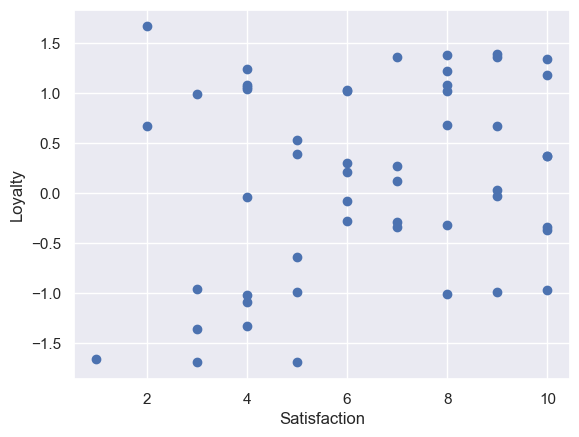

In [4]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [5]:
x = data.copy()

In [6]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [7]:
clusters = x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

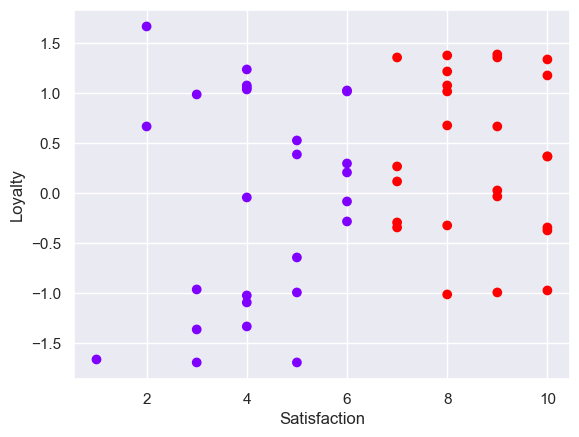

In [8]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [9]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.94433317, -1.54735436],
       [-0.14828372, -0.44855014],
       [-0.54630845, -1.19155109],
       [ 0.249741  , -0.45901495],
       [-0.94433317,  0.95373333],
       [-2.13840734, -1.89269283],
       [ 1.44381518, -1.17062149],
       [ 0.64776573, -0.49040935],
       [ 0.64776573,  0.91187412],
       [ 0.64776573,  0.55607085],
       [ 1.44381518, -0.51133896],
       [-0.54630845,  0.25259159],
       [-0.54630845, -1.92408723],
       [-1.74038262,  0.54560605],
       [ 0.249741  ,  0.12701397],
       [ 1.04579045,  1.26767739],
       [ 0.64776573,  1.288607  ],
       [ 0.249741  ,  1.26767739],
       [ 0.249741  , -0.51133896],
       [ 1.04579045,  0.54560605],
       [ 1.44381518,  1.07931096],
       [-1.34235789, -1.92408723],
       [-0.94433317,  0.93280373],
       [-1.34235789, -1.16015668],
       [-0.14828372,  0.92233893],
       [ 1.04579045, -1.19155109],
       [ 1.44381518,  0.23166199],
       [ 1.04579045, -0.12414128],
       [-1.34235789,

In [10]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

[101.99999999999997,
 59.87404052566194,
 35.143547682734486,
 21.136575250443112,
 15.09135926421941,
 12.9827137370961,
 10.751817177376552,
 9.262471882664283,
 7.683562549190567]

Text(0, 0.5, 'WCSS')

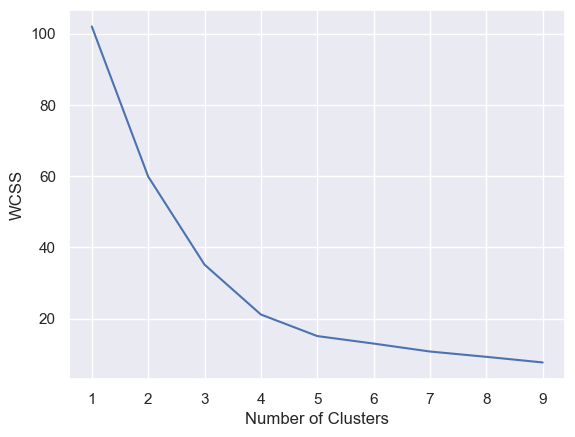

In [11]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [12]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [13]:
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,3
1,6,-0.28,0
2,5,-0.99,3
3,7,-0.29,0
4,4,1.06,2
5,1,-1.66,3
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,1
9,8,0.68,1


Text(0, 0.5, 'Loyalty')

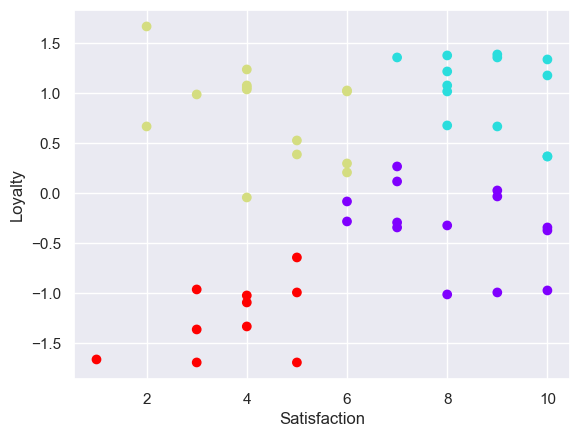

In [14]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')